In [130]:
import pandas as pd 
import funciones
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopy

%matplotlib inline

#### Extraccion y lectura de los datos

In [131]:
df_accidentes = pd.read_csv("../data/AccidentesAviones.csv", sep=",", encoding="utf-8")

Primera exploracion y estudi de la estrucrura del dataframe 

In [132]:
df_accidentes.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [133]:
df_accidentes.shape

(5008, 18)

In [134]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

Por ahora nos encontramos con que el dataframe tiene 5008 registros, y 18 columnas, a a primera vista nos damos cuenta que tiene datos faltantes o nulos pero que estan representados con el caracter "?", por ahora evaluaremos el tipo de datos y el porcentaje de datos nulos antes de comenzar a reemplazar y transformar

In [135]:
funciones.verificar_datos(df_accidentes)

Advertencia: la columna route, tiene valores nulos


,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,Unnamed: 0,[<class 'int'>],0,0.00,100.00
1,fecha,[<class 'str'>],0,0.00,100.00
2,HORA declarada,[<class 'str'>],0,0.00,100.00
3,Ruta,[<class 'str'>],0,0.00,100.00
4,OperadOR,[<class 'str'>],0,0.00,100.00
5,flight_no,[<class 'str'>],0,0.00,100.00
6,route,"[<class 'str'>, <class 'float'>]",1,0.02,99.98
7,ac_type,[<class 'str'>],0,0.00,100.00
8,registration,[<class 'str'>],0,0.00,100.00
9,cn_ln,[<class 'str'>],0,0.00,100.00


Podemos observear que eviste un solo dato nulo en la columna "rute", procedemos a verificar el dato

In [136]:
funciones.valores_nulos_columna(df_accidentes, "route")

c:\Users\fredd\Desktop\Data_Analytics_Accidentes_Aereos\Notebooks\funciones.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nulos["index"] = df_nulos.index


,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary,index
3173,3173,"March 19, 1982",10:30,"Leesburg, Florida",Private,?,NaN,Beechcraft Bonanza F35,N567LT,D-4114,3,2,1,3,2,1,0,"Randy Rhoads, 25, lead guitarist for heavy met...",3173


Correcto el dato que figura como nulo en la columna "route" no es un registro totalmente vacio. 

Ahora procredemos a reemplazar el valor "?" por NaN y asi obtener com presición la cantidad de datos nulos del conjunto

In [137]:
df_accidentes.replace("?", np.nan, inplace= True)

In [139]:
df_accidentes.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,14,NaN,NaN,0,The airship flew into a thunderstorm and encou...


#### Dicionario de datos:

-unnamed - index antiguo de la lista

-fecha - fecha del accidente.

-hora_declarada- hora local formato 24h hh:mm.

-ruta - locacion del accidente.

-operador - aerolinea en operacion de la aeronave.

-flight_no - nuemero de vuelo asignado a esta aeronave.

-route- ruta que cumplia la aeronave.

-ac_type - tipo de aeronave.

-registration - registro icao de la aeronave.

-cn_ln -serie de la aeronave .

-all board- total personas en el vuelo.

-pasajeros a bordo- pasajeros a bordo.

-crew aboard -tripulantes a bordo.

-total fatalities -total de vidas perdidas.

-passenger fatalities - pasajeros fallecidos.

-crew fatalities - tripulantes fallecidos.

-ground - total de muertos en tierra

-summary - breve descripcion del accidente y s.u posible causa.

Podemos observar que todos los valores que estaban representados con "?" ahora estan como valores nulos y pueden ser contavilizados

In [140]:
funciones.verificar_datos(df_accidentes)

Advertencia: la columna HORA declarada, tiene valores nulos
Advertencia: la columna Ruta, tiene valores nulos
Advertencia: la columna OperadOR, tiene valores nulos
Advertencia: la columna flight_no, tiene valores nulos
Advertencia: la columna route, tiene valores nulos
Advertencia: la columna ac_type, tiene valores nulos
Advertencia: la columna registration, tiene valores nulos
Advertencia: la columna cn_ln, tiene valores nulos
Advertencia: la columna all_aboard, tiene valores nulos
Advertencia: la columna PASAJEROS A BORDO, tiene valores nulos
Advertencia: la columna crew_aboard, tiene valores nulos
Advertencia: la columna cantidad de fallecidos, tiene valores nulos
Advertencia: la columna passenger_fatalities, tiene valores nulos
Advertencia: la columna crew_fatalities, tiene valores nulos
Advertencia: la columna ground, tiene valores nulos
Advertencia: la columna summary, tiene valores nulos


,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,Unnamed: 0,[<class 'int'>],0,0.00,100.00
1,fecha,[<class 'str'>],0,0.00,100.00
2,HORA declarada,"[<class 'str'>, <class 'float'>]",1504,30.03,69.97
3,Ruta,"[<class 'str'>, <class 'float'>]",5,0.10,99.90
4,OperadOR,"[<class 'str'>, <class 'float'>]",10,0.20,99.80
5,flight_no,"[<class 'float'>, <class 'str'>]",3682,73.52,26.48
6,route,"[<class 'str'>, <class 'float'>]",763,15.24,84.76
7,ac_type,"[<class 'str'>, <class 'float'>]",13,0.26,99.74
8,registration,"[<class 'float'>, <class 'str'>]",272,5.43,94.57
9,cn_ln,"[<class 'str'>, <class 'float'>]",667,13.32,86.68


Podemos observar la cantidad de datos nulos por columnas y lo que representa en porcentaje. procedemos a verlo en grafico

In [141]:
# Obtenemos el porcentaje de los valores nulos 
nul_porc = ((df_accidentes.isnull().sum()/len(df_accidentes))*100).sort_values(ascending = False)

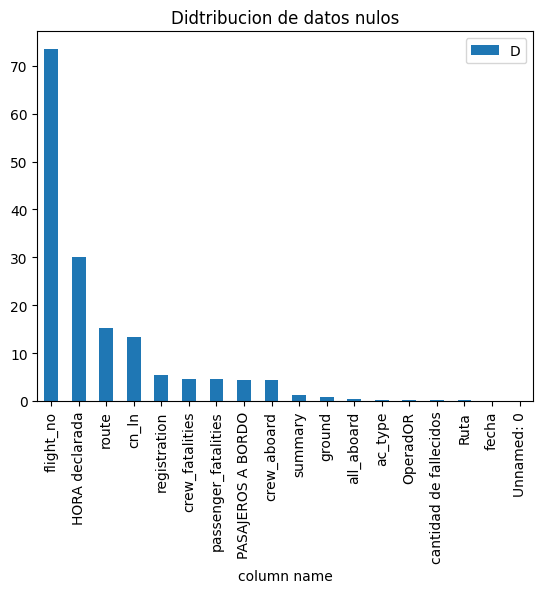

In [142]:
nul_porc.plot(kind="bar")
plt.title("Didtribucion de datos nulos")
plt.xlabel("column name")
plt.legend("Distribucion de datos nulos")
plt.show()

De esta manera obtenemos una visión mas clara de lo que estamos encontrando en el dataset

Se eliminaran las columnas "Unnamed: 0", ya que este es un identificador, y esta función puede ser realizada con el mismo idice del dataframe, por ejmplo, de igual manera la columna "flight_n0" sera eliminada, ya que contiene el 73.52 % de los datos nulos, ademas los accidentes aéreos se pueden identificar utilizando otras columnas, como la fecha, la hora y la ruta

In [143]:
df_accidentes = df_accidentes.drop(["Unnamed: 0", "flight_no"], axis=1)

In [144]:
Valores = funciones.verificar_datos(df_accidentes)
Valores

Advertencia: la columna HORA declarada, tiene valores nulos
Advertencia: la columna Ruta, tiene valores nulos
Advertencia: la columna OperadOR, tiene valores nulos
Advertencia: la columna route, tiene valores nulos
Advertencia: la columna ac_type, tiene valores nulos
Advertencia: la columna registration, tiene valores nulos
Advertencia: la columna cn_ln, tiene valores nulos
Advertencia: la columna all_aboard, tiene valores nulos
Advertencia: la columna PASAJEROS A BORDO, tiene valores nulos
Advertencia: la columna crew_aboard, tiene valores nulos
Advertencia: la columna cantidad de fallecidos, tiene valores nulos
Advertencia: la columna passenger_fatalities, tiene valores nulos
Advertencia: la columna crew_fatalities, tiene valores nulos
Advertencia: la columna ground, tiene valores nulos
Advertencia: la columna summary, tiene valores nulos


,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,fecha,[<class 'str'>],0,0.00,100.00
1,HORA declarada,"[<class 'str'>, <class 'float'>]",1504,30.03,69.97
2,Ruta,"[<class 'str'>, <class 'float'>]",5,0.10,99.90
3,OperadOR,"[<class 'str'>, <class 'float'>]",10,0.20,99.80
4,route,"[<class 'str'>, <class 'float'>]",763,15.24,84.76
5,ac_type,"[<class 'str'>, <class 'float'>]",13,0.26,99.74
6,registration,"[<class 'float'>, <class 'str'>]",272,5.43,94.57
7,cn_ln,"[<class 'str'>, <class 'float'>]",667,13.32,86.68
8,all_aboard,"[<class 'str'>, <class 'float'>]",17,0.34,99.66
9,PASAJEROS A BORDO,"[<class 'str'>, <class 'float'>]",221,4.41,95.59


#### Columna crew_fatalities

In [145]:
# Contar el numro de valores nulos de la columna "crew_fatalities"
nulos_cre_fat = df_accidentes["crew_fatalities"].isnull().sum()

In [146]:
# Calcular la proporción de valores nulos en la columna "crew_fatalities"
pro_nulos_cre_fat = nulos_cre_fat/len(df_accidentes)

In [147]:
print("Número de valores nulos:", nulos_cre_fat)
print("Proporción de valores nulos:", pro_nulos_cre_fat)

Número de valores nulos: 235
Proporción de valores nulos: 0.046924920127795526


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


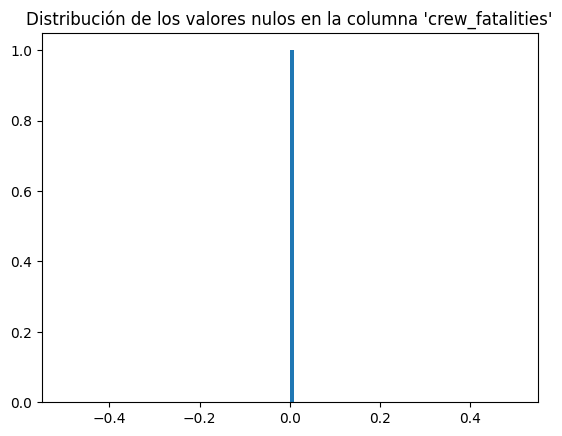

In [148]:

# Crear una lista con las posiciones de los valores nulos
posicion_nulos = df_accidentes["crew_fatalities"].isnull().to_numpy()[0]

# Crear un gráfico de barras con la distribución de los valores nulos
plt.hist(posicion_nulos, bins=100)
plt.title("Distribución de los valores nulos en la columna 'crew_fatalities'")
plt.show()

Como los valores nulos representan un 4.69% de los datos de esta columna, se maneja las posibiloidades tanto de eliminar los datos, o realizar la imputacion de los mismos usando la mediana o la media de la poblacion

Imputación por la mediana

In [149]:
# Creamos una copia del df
imputed_median_null = df_accidentes.copy()
df_no_null = df_accidentes.copy()

Primero observamos la distribución de los datos no nulos en un grafico 

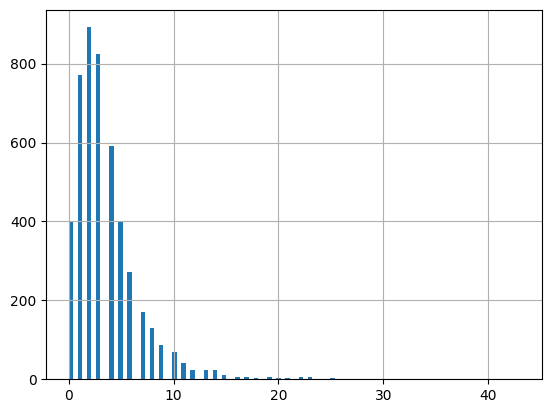

In [150]:
# Eliminamos los datos nulos 
df_no_null = df_no_null.dropna(subset=["crew_fatalities"])
df_no_null["crew_fatalities"].astype("int").hist(bins=100)
plt.show()

In [151]:
# Realizamos la imputacion

imputed_median_null["crew_fatalities"].fillna(imputed_median_null["crew_fatalities"].median(), inplace=True)

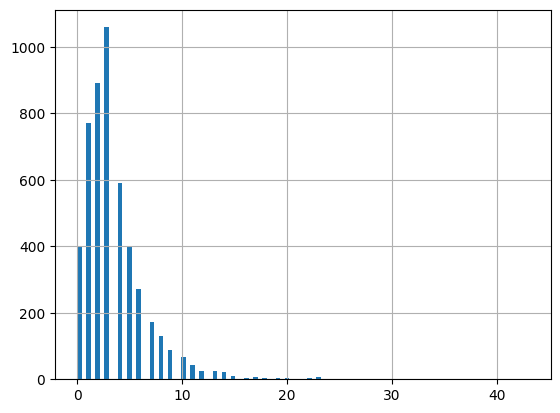

In [152]:
imputed_median_null["crew_fatalities"].astype("int").hist(bins=100)
plt.show()

Comparando los dos gráficos, podemos ver que la distribución de los valores imputados por la mediana es similar a la distribución de los valores no nulos. En ambos casos, la distribución es unimodal y centrada en el valor 10. La única diferencia es que la distribución de los valores imputados por la mediana es ligeramente más sesgada hacia la izquierda que la distribución de los valores no nulos. Sin embargo, esta diferencia es pequeña y no se considera estadísticamente significativa.

In [153]:
# Aplicamos la imputacion seleccionada 
df_accidentes["crew_fatalities"] = imputed_median_null["crew_fatalities"]

In [154]:
# Verificamos los nulos
funciones.verificar_datos(df_accidentes)

Advertencia: la columna HORA declarada, tiene valores nulos
Advertencia: la columna Ruta, tiene valores nulos
Advertencia: la columna OperadOR, tiene valores nulos
Advertencia: la columna route, tiene valores nulos
Advertencia: la columna ac_type, tiene valores nulos
Advertencia: la columna registration, tiene valores nulos
Advertencia: la columna cn_ln, tiene valores nulos
Advertencia: la columna all_aboard, tiene valores nulos
Advertencia: la columna PASAJEROS A BORDO, tiene valores nulos
Advertencia: la columna crew_aboard, tiene valores nulos
Advertencia: la columna cantidad de fallecidos, tiene valores nulos
Advertencia: la columna passenger_fatalities, tiene valores nulos
Advertencia: la columna ground, tiene valores nulos
Advertencia: la columna summary, tiene valores nulos


,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,fecha,[<class 'str'>],0,0.00,100.00
1,HORA declarada,"[<class 'str'>, <class 'float'>]",1504,30.03,69.97
2,Ruta,"[<class 'str'>, <class 'float'>]",5,0.10,99.90
3,OperadOR,"[<class 'str'>, <class 'float'>]",10,0.20,99.80
4,route,"[<class 'str'>, <class 'float'>]",763,15.24,84.76
5,ac_type,"[<class 'str'>, <class 'float'>]",13,0.26,99.74
6,registration,"[<class 'float'>, <class 'str'>]",272,5.43,94.57
7,cn_ln,"[<class 'str'>, <class 'float'>]",667,13.32,86.68
8,all_aboard,"[<class 'str'>, <class 'float'>]",17,0.34,99.66
9,PASAJEROS A BORDO,"[<class 'str'>, <class 'float'>]",221,4.41,95.59


#### Columna passenger_fatalities

en esta columna nos encontramos coon un problema muy similar a la columna conformada por los fallecidos de la tripulacion, por ello aplicaremos el analisis y en base al mismo aplicaremos la imputación de los valores nulos

In [155]:
# De igual manera creamos un df copia para poder realizar nuestro analisis
df_null_passenger_fat = df_accidentes.copy()
df_imputed_passenger_fat = df_accidentes.copy()

Primero observamos la distribucon de los datos no nulos

In [156]:
# Eliminamos los datos nulos
df_null_passenger_fat = df_null_passenger_fat.dropna(subset=["passenger_fatalities"])

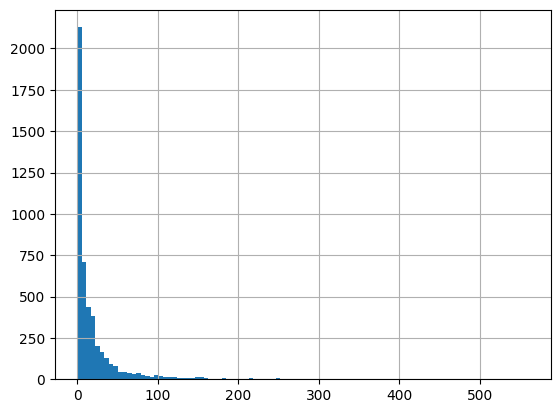

In [157]:
# Convertimos en entero y graficamos
df_null_passenger_fat["passenger_fatalities"].astype("int").hist(bins=100)
plt.show()

Procedemos a realizar la imputacion de los datos usando la mediana

In [158]:
# Imputamos los alores
df_imputed_passenger_fat["passenger_fatalities"].fillna(df_imputed_passenger_fat["passenger_fatalities"].median(), inplace=True)

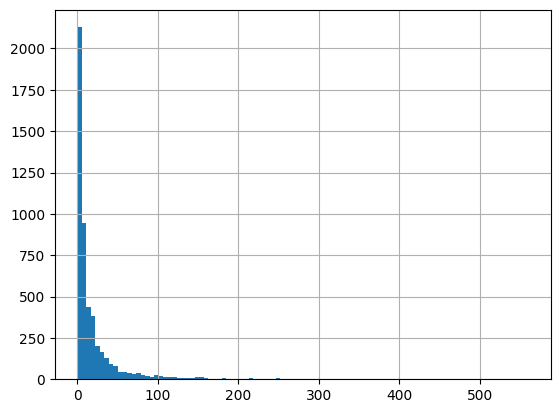

In [159]:
df_imputed_passenger_fat["passenger_fatalities"].astype("int").hist(bins=100)
plt.show()

Comparando los dos gráficos, podemos ver que la distribución de los valores imputados por la mediana es similar a la distribución de los valores no nulos. En ambos casos, la distribución es unimodal y centrada en el valor 0.

La única diferencia es que la distribución de los valores imputados por la mediana tiene una cola ligeramente más larga hacia la derecha. Sin embargo, esta diferencia es pequeña y no es estadísticamente significativa.

De esta manera aplicamos la imputacion de los datos nulos usando la mediana,  en el df original

In [160]:
# Aplicamos la imputacion
df_accidentes["passenger_fatalities"] = df_imputed_passenger_fat["passenger_fatalities"]

In [161]:
# Verificamos los datos
funciones.verificar_datos(df_accidentes)

Advertencia: la columna HORA declarada, tiene valores nulos
Advertencia: la columna Ruta, tiene valores nulos
Advertencia: la columna OperadOR, tiene valores nulos
Advertencia: la columna route, tiene valores nulos
Advertencia: la columna ac_type, tiene valores nulos
Advertencia: la columna registration, tiene valores nulos
Advertencia: la columna cn_ln, tiene valores nulos
Advertencia: la columna all_aboard, tiene valores nulos
Advertencia: la columna PASAJEROS A BORDO, tiene valores nulos
Advertencia: la columna crew_aboard, tiene valores nulos
Advertencia: la columna cantidad de fallecidos, tiene valores nulos
Advertencia: la columna ground, tiene valores nulos
Advertencia: la columna summary, tiene valores nulos


,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,fecha,[<class 'str'>],0,0.00,100.00
1,HORA declarada,"[<class 'str'>, <class 'float'>]",1504,30.03,69.97
2,Ruta,"[<class 'str'>, <class 'float'>]",5,0.10,99.90
3,OperadOR,"[<class 'str'>, <class 'float'>]",10,0.20,99.80
4,route,"[<class 'str'>, <class 'float'>]",763,15.24,84.76
5,ac_type,"[<class 'str'>, <class 'float'>]",13,0.26,99.74
6,registration,"[<class 'float'>, <class 'str'>]",272,5.43,94.57
7,cn_ln,"[<class 'str'>, <class 'float'>]",667,13.32,86.68
8,all_aboard,"[<class 'str'>, <class 'float'>]",17,0.34,99.66
9,PASAJEROS A BORDO,"[<class 'str'>, <class 'float'>]",221,4.41,95.59


#### Columna cantidad de fallecidos

Podemos observar que la columna cantidad de fallecidos, tambien cuenta con datos nulos, en este caso con un 0.16% de los tados, como ya tenemos los datos completos en las columnas passenger_fatalities y crew_fatalities, procedemos a calcular los datos de esta columna 

In [162]:
# Antes que nada coambiamos el nombre de la columna ya que contiene espacios en ella 
df_accidentes.rename(columns={"cantidad de fallecidos": "total_fatalities"}, inplace=True)

In [163]:
df_accidentes.columns 

Index(['fecha', 'HORA declarada', 'Ruta', 'OperadOR', 'route', 'ac_type',
       'registration', 'cn_ln', 'all_aboard', 'PASAJEROS A BORDO',
       'crew_aboard', 'total_fatalities', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary'],
      dtype='object')

Cambiamos a entero las columnas involucradas

In [164]:
# Cambiar dato a float
df_accidentes["crew_fatalities"] = df_accidentes["crew_fatalities"].astype(int)

In [165]:
# Cambiar dato a float
df_accidentes["passenger_fatalities"] = df_accidentes["passenger_fatalities"].astype(int)

primero cambiamos la columna "total_fatalities" a float, ya que contiene datos nulos

In [166]:
# Cambiar dato a float
df_accidentes["total_fatalities"] = df_accidentes["total_fatalities"].astype(float)

Luego calculamos la cantidad total de fallecidos por acciente

In [167]:
df_accidentes["total_fatalities"] = df_accidentes["crew_fatalities"] + df_accidentes["passenger_fatalities"]

In [168]:
df_accidentes["total_fatalities"] = df_accidentes["total_fatalities"].astype(int)

In [169]:
funciones.verificar_datos(df_accidentes)

Advertencia: la columna HORA declarada, tiene valores nulos
Advertencia: la columna Ruta, tiene valores nulos
Advertencia: la columna OperadOR, tiene valores nulos
Advertencia: la columna route, tiene valores nulos
Advertencia: la columna ac_type, tiene valores nulos
Advertencia: la columna registration, tiene valores nulos
Advertencia: la columna cn_ln, tiene valores nulos
Advertencia: la columna all_aboard, tiene valores nulos
Advertencia: la columna PASAJEROS A BORDO, tiene valores nulos
Advertencia: la columna crew_aboard, tiene valores nulos
Advertencia: la columna ground, tiene valores nulos
Advertencia: la columna summary, tiene valores nulos


,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,fecha,[<class 'str'>],0,0.00,100.00
1,HORA declarada,"[<class 'str'>, <class 'float'>]",1504,30.03,69.97
2,Ruta,"[<class 'str'>, <class 'float'>]",5,0.10,99.90
3,OperadOR,"[<class 'str'>, <class 'float'>]",10,0.20,99.80
4,route,"[<class 'str'>, <class 'float'>]",763,15.24,84.76
5,ac_type,"[<class 'str'>, <class 'float'>]",13,0.26,99.74
6,registration,"[<class 'float'>, <class 'str'>]",272,5.43,94.57
7,cn_ln,"[<class 'str'>, <class 'float'>]",667,13.32,86.68
8,all_aboard,"[<class 'str'>, <class 'float'>]",17,0.34,99.66
9,PASAJEROS A BORDO,"[<class 'str'>, <class 'float'>]",221,4.41,95.59


Pdemos Observar que se completo la columna "total_fatalities", de esta manera vamos conociendo la cantidad total de fallecidos por accidente y cuantos son de la tripulacion y cuantos son pasajeros

#### Columna "all_aboard"

Esta columna tambien presenta una cantidad de datos nulos, aunque en mucho menor procentaje, ya que representa un 0.34%, de igual manrea analizamos si esa factible impituar los datos

Creamos una copia del dataframe original para trabajar en el y realizar las pruebas y el analisis

In [170]:
# Cremos la copia
df_all_aboards_null = df_accidentes.copy()
df_all_aboards_imputed = df_accidentes.copy()

In [171]:
# Eliminamos los datos nulos
df_all_aboards_null = df_all_aboards_null.dropna(subset=["all_aboard"])

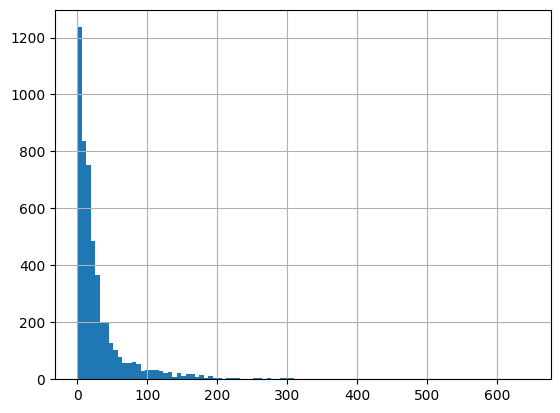

In [172]:
# Graficamos los datos no nulpos
df_all_aboards_null["all_aboard"].astype(int).hist(bins=100)
plt.show()

Trabajamos con los valores imputados

In [173]:
# Imputamos losd valores con la mediana
df_all_aboards_imputed["all_aboard"].fillna(df_all_aboards_imputed["all_aboard"].median(), inplace=True)

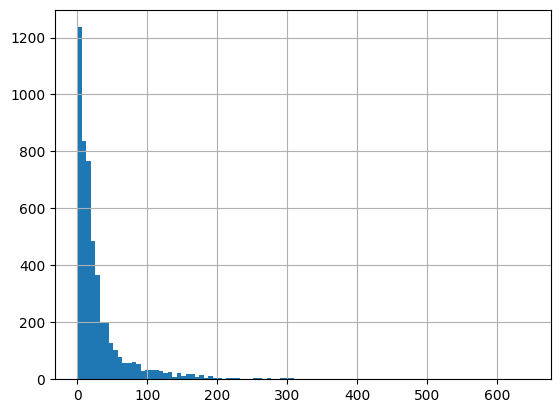

In [174]:
# Graficamos
df_all_aboards_imputed["all_aboard"].astype("int").hist(bins=100)
plt.show()

La distribución de los valores imputados es similar a la distribución de los valores no nulos, con un pico en torno a los 100 pasajeros a bordo. En conclusión, la imputación con la mediana es una buena opción para la columna all_aboard. Esta técnica mantiene la distribución original de los datos y permite realizar análisis estadísticos precisos.

In [175]:
# Procedemos a realizar la imputacion al dataset original
df_accidentes["all_aboard"] = df_all_aboards_imputed["all_aboard"]

In [176]:
# Verificamos los datos
funciones.verificar_datos(df_accidentes)

Advertencia: la columna HORA declarada, tiene valores nulos
Advertencia: la columna Ruta, tiene valores nulos
Advertencia: la columna OperadOR, tiene valores nulos
Advertencia: la columna route, tiene valores nulos
Advertencia: la columna ac_type, tiene valores nulos
Advertencia: la columna registration, tiene valores nulos
Advertencia: la columna cn_ln, tiene valores nulos
Advertencia: la columna PASAJEROS A BORDO, tiene valores nulos
Advertencia: la columna crew_aboard, tiene valores nulos
Advertencia: la columna ground, tiene valores nulos
Advertencia: la columna summary, tiene valores nulos


,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,fecha,[<class 'str'>],0,0.00,100.00
1,HORA declarada,"[<class 'str'>, <class 'float'>]",1504,30.03,69.97
2,Ruta,"[<class 'str'>, <class 'float'>]",5,0.10,99.90
3,OperadOR,"[<class 'str'>, <class 'float'>]",10,0.20,99.80
4,route,"[<class 'str'>, <class 'float'>]",763,15.24,84.76
5,ac_type,"[<class 'str'>, <class 'float'>]",13,0.26,99.74
6,registration,"[<class 'float'>, <class 'str'>]",272,5.43,94.57
7,cn_ln,"[<class 'str'>, <class 'float'>]",667,13.32,86.68
8,all_aboard,"[<class 'str'>, <class 'numpy.float64'>]",0,0.00,100.00
9,PASAJEROS A BORDO,"[<class 'str'>, <class 'float'>]",221,4.41,95.59


In [177]:
df_accidentes.head(1)

,fecha,HORA declarada,Ruta,OperadOR,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."


#### Columna "crew_aboard"

Esta columna presenta una cantidad de 219 datos nulos que representan un 4.37%, ademas la columna crew_aboard no puede ser imputada con medidas de tendencia central, ya que depende de varios factores, como el tipo de aeronave, el tamaño de la aeronave y la aerolínea.Es por ello que buscaremos otro metodo para realizar la imputacion de los datos

Primero le damos formato a la colunmna fecha, creando una nueva columna llamada date, que contiene ahora la fecha en formato YY-mm-dd

In [178]:
df_accidentes["date"] = df_accidentes["fecha"].apply(funciones.formatear_fecha)

Verificamos la creacion de la columna

In [179]:
df_accidentes.head()

,fecha,HORA declarada,Ruta,OperadOR,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary,date
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908-09-17
1,"September 07, 1909",NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,0,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912-07-12
3,"August 06, 1913",NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913-08-06
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,10,7,3,0,The airship flew into a thunderstorm and encou...,1913-09-09


Verificamos que toda las fechas esten completas y ninguna tenga un formato invalido

In [180]:
df_accidentes[df_accidentes["date"] == "Formato inválido"]

,fecha,HORA declarada,Ruta,OperadOR,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,ground,summary,date


Eliminamos la columna fecha

In [181]:
df_accidentes = df_accidentes.drop("fecha", axis=1)

Verificamos las columnas

In [182]:
df_accidentes.columns

Index(['HORA declarada', 'Ruta', 'OperadOR', 'route', 'ac_type',
       'registration', 'cn_ln', 'all_aboard', 'PASAJEROS A BORDO',
       'crew_aboard', 'total_fatalities', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary', 'date'],
      dtype='object')

luego creamos otra columna para obtener solo el año de la fecha

In [183]:
df_accidentes["year"] = df_accidentes["date"].apply(funciones.funcion_year)

In [184]:
df_accidentes.columns

Index(['HORA declarada', 'Ruta', 'OperadOR', 'route', 'ac_type',
       'registration', 'cn_ln', 'all_aboard', 'PASAJEROS A BORDO',
       'crew_aboard', 'total_fatalities', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary', 'date', 'year'],
      dtype='object')

Procedemos a formalizar el nombre de cada columna

In [185]:
df_accidentes.rename(columns={'HORA declarada': 'Declared_time',
                              'Ruta': 'Location',
                              'OperadOR': 'Operator',
                              'route': 'Route',
                              'ac_type': 'Aircraft_type',
                              'registration': 'Registration',
                              'cn_ln': 'fuselage_registration',
                              'all_aboard': 'All_aboard',
                              'PASAJEROS A BORDO': 'Passenger_on_board',
                              'crew_aboard': 'Crew_aboard',
                              'total_fatalities': 'Total_deaths',
                              'passenger_fatalities': 'Passenger_deaths',
                              'crew_fatalities': 'crew_deaths',
                              'ground': 'Deceased_on_land',
                              'summary': 'Summary',
                              'date': 'Date',
                              'year': 'Year'    
}, inplace=True)

#### Columna Location

verificamos el formato de los datos de esta columna

In [186]:
df_accidentes.Location.unique()

array(['Fort Myer, Virginia', 'Juvisy-sur-Orge, France',
       'Atlantic City, New Jersey', ..., 'Near Pyin Oo Lwin, Myanmar',
       'Patikul, Sulu, Philippines', 'Palana, Russia'], dtype=object)

Nos damos cuenta que es una lista conformada por la ciudad, el estado y el pais de cada accidente. Pero si observamos bien el primer registro no tiene el pais, por lo tanto no sabemos cuantos mas registros puedan estar asi  

In [187]:
funciones.verificar_datos(df_accidentes)

Advertencia: la columna Declared_time, tiene valores nulos
Advertencia: la columna Location, tiene valores nulos
Advertencia: la columna Operator, tiene valores nulos
Advertencia: la columna Route, tiene valores nulos
Advertencia: la columna Aircraft_type, tiene valores nulos
Advertencia: la columna Registration, tiene valores nulos
Advertencia: la columna fuselage_registration, tiene valores nulos
Advertencia: la columna Passenger_on_board, tiene valores nulos
Advertencia: la columna Crew_aboard, tiene valores nulos
Advertencia: la columna Deceased_on_land, tiene valores nulos
Advertencia: la columna Summary, tiene valores nulos


,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,Declared_time,"[<class 'str'>, <class 'float'>]",1504,30.03,69.97
1,Location,"[<class 'str'>, <class 'float'>]",5,0.10,99.90
2,Operator,"[<class 'str'>, <class 'float'>]",10,0.20,99.80
3,Route,"[<class 'str'>, <class 'float'>]",763,15.24,84.76
4,Aircraft_type,"[<class 'str'>, <class 'float'>]",13,0.26,99.74
5,Registration,"[<class 'float'>, <class 'str'>]",272,5.43,94.57
6,fuselage_registration,"[<class 'str'>, <class 'float'>]",667,13.32,86.68
7,All_aboard,"[<class 'str'>, <class 'numpy.float64'>]",0,0.00,100.00
8,Passenger_on_board,"[<class 'str'>, <class 'float'>]",221,4.41,95.59
9,Crew_aboard,"[<class 'str'>, <class 'float'>]",219,4.37,95.63


In [188]:
df_accidentes.Location[0]


'Fort Myer, Virginia'

Tambien sabemos que la columna posee datos nulos, los vuales vamos a verificar

In [189]:
df_accidentes[pd.isnull(df_accidentes["Location"])]

,Declared_time,Location,Operator,Route,Aircraft_type,Registration,fuselage_registration,All_aboard,Passenger_on_board,Crew_aboard,Total_deaths,Passenger_deaths,crew_deaths,Deceased_on_land,Summary,Date,Year
360,NaN,NaN,Aeroflot,NaN,Tupolev ANT-9,NaN,NaN,10,8,2,10,8,2,0,Crashed under unknown circumstances.,1934-12-31,1934
465,NaN,NaN,ENTA,San José San Isidro de El General,Travel Air 6000,TI-3,NaN,6,5,1,6,5,1,NaN,Hit trees and crashed in an isolated area loca...,1937-06-20,1937
646,NaN,NaN,Deutsche Lufthansa,NaN,Siebel Si-204,NaN,NaN,4,2,2,4,2,2,0,"Lufthansa chairman, Von Gablenz killed.",1942-08-21,1942
999,NaN,NaN,China National Aviation Corporation,NaN,Douglas DC-3,NaN,NaN,3,0,3,2,0,2,0,The cargo plane was shot down by communist ant...,1947-11-27,1947
2895,NaN,NaN,North Canada Air,NaN,Bristol 170 Freighter 31M,C-FWAD,13253,2,0,2,1,0,1,0,The cargo plane stalled nearly vertical and cr...,1977-01-20,1977


Como los datos nulos de la columna Location son 5 y representan solo el 0.1% de los registros, se llega a la conclusion de que se pueden eliminar ya que no tendra un impacto significativo, en el conjunto de datos la ausencia de ellos

Extraemos el pais donde ocurrio el accidente

In [190]:
# Comu en este dataset, los accidentes que ocuerrieron en los estados unidos lo documentan solo con el estadot pues necesitamos una lista de los estados 
estados_unidos = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

In [191]:
paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

In [67]:
def obtener_pais(location):
    """
    Obtiene el país de una ubicación.

    Args:
        location: La ubicación a obtener el país.

    Returns:
        El país de la ubicación.
    """

    # Convertimos la ubicación a cadena.
    location_str = str(location)

    # Buscamos el país en la lista de estados de Estados Unidos.
    if location_str.split(",").pop(-1) in estados_unidos:
        return "Estados Unidos"

    # Si no se encontró el país en la lista de estados de Estados Unidos,
    # lo buscamos en la lista de países.
    for pais in paises:
        if pais in location_str:
            return pais

    return "other"

In [192]:
df_accidentes["Country"] = df_accidentes["Location"].apply(obtener_pais)

In [193]:
df_accidentes.head()

,Declared_time,Location,Operator,Route,Aircraft_type,Registration,fuselage_registration,All_aboard,Passenger_on_board,Crew_aboard,Total_deaths,Passenger_deaths,crew_deaths,Deceased_on_land,Summary,Date,Year,Country
0,1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908-09-17,1908,other
1,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,0,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07,1909,France
2,0630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912-07-12,1912,other
3,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913-08-06,1913,Canada
4,1830,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,10,7,3,0,The airship flew into a thunderstorm and encou...,1913-09-09,1913,other


In [194]:
# Reemplazamos en  'country' el valor 'other' por 'United States' si 'location' contiene un estado de los Estados Unidos
df_accidentes.loc[df_accidentes['Location'].str.contains('|'.join(estados_unidos), case=False, na=False), 'Country'] = 'United States'

In [195]:
df_accidentes.head()

,Declared_time,Location,Operator,Route,Aircraft_type,Registration,fuselage_registration,All_aboard,Passenger_on_board,Crew_aboard,Total_deaths,Passenger_deaths,crew_deaths,Deceased_on_land,Summary,Date,Year,Country
0,1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908-09-17,1908,United States
1,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,0,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07,1909,France
2,0630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912-07-12,1912,United States
3,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913-08-06,1913,Canada
4,1830,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,10,7,3,0,The airship flew into a thunderstorm and encou...,1913-09-09,1913,other


In [110]:
df_accidentes_copy = pd.read_csv("../data/AccidentesAviones.csv", encoding="utf-8")

In [113]:
df_accidentes_copy["Ruta"] = df_accidentes_copy["Ruta"].fillna("Unknown", inplace=True)

In [114]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="freddy.valero002@gmail.com")
from time import sleep

In [115]:
latitude=[]
longitude=[]

In [116]:
"""for i,elemento in enumerate(df_accidentes_copy["Ruta"]):
    try: 
        Ruta = geolocator.geocode(df_accidentes_copy["Ruta"][i]) 
        print(Ruta.address) 
        latitude.append(Ruta.latitude)
        longitude.append(Ruta.longitude)
    except:
        print(df_accidentes_copy["Ruta"][i]) 
        latitude.append(None)
        longitude.append(None)

    i+=1
    print(i)
    print('Go to sleep…')
    sleep(1)
    print('Back to work…')"""

None, Torino, Piemonte, Italia
1
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
2
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
3
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
4
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
5
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
6
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
7
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
8
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
9
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
10
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
11
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
12
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
13
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
14
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
15
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
16
Go to sleep…
Back to work…
None, Torino, Piemonte, Italia
17

In [196]:
coordenadas=pd.DataFrame()
coordenadas['lat']=latitude
coordenadas['long']=longitude
coordenadas.head()

,lat,long
0,44.933143,7.540121
1,44.933143,7.540121
2,44.933143,7.540121
3,44.933143,7.540121
4,44.933143,7.540121


In [197]:
funciones.verificar_datos(df_accidentes)

Advertencia: la columna Declared_time, tiene valores nulos
Advertencia: la columna Location, tiene valores nulos
Advertencia: la columna Operator, tiene valores nulos
Advertencia: la columna Route, tiene valores nulos
Advertencia: la columna Aircraft_type, tiene valores nulos
Advertencia: la columna Registration, tiene valores nulos
Advertencia: la columna fuselage_registration, tiene valores nulos
Advertencia: la columna Passenger_on_board, tiene valores nulos
Advertencia: la columna Crew_aboard, tiene valores nulos
Advertencia: la columna Deceased_on_land, tiene valores nulos
Advertencia: la columna Summary, tiene valores nulos


,columna,tipo_dato,datos_nulos,porcentaje_nulos,porcentaje_no_nulos
0,Declared_time,"[<class 'str'>, <class 'float'>]",1504,30.03,69.97
1,Location,"[<class 'str'>, <class 'float'>]",5,0.10,99.90
2,Operator,"[<class 'str'>, <class 'float'>]",10,0.20,99.80
3,Route,"[<class 'str'>, <class 'float'>]",763,15.24,84.76
4,Aircraft_type,"[<class 'str'>, <class 'float'>]",13,0.26,99.74
5,Registration,"[<class 'float'>, <class 'str'>]",272,5.43,94.57
6,fuselage_registration,"[<class 'str'>, <class 'float'>]",667,13.32,86.68
7,All_aboard,"[<class 'str'>, <class 'numpy.float64'>]",0,0.00,100.00
8,Passenger_on_board,"[<class 'str'>, <class 'float'>]",221,4.41,95.59
9,Crew_aboard,"[<class 'str'>, <class 'float'>]",219,4.37,95.63


In [198]:
# Formateamos la columna Hora
df_accidentes['Declared_time'] = df_accidentes['Declared_time'].str.replace(r'(\d{2})(\d{2})', r'\1:\2', regex=True)

In [199]:
# Elimina espacios en blanco alrededor de los valores
df_accidentes['Declared_time'] = df_accidentes['Declared_time'].str.strip()

In [200]:
df_accidentes.head()

,Declared_time,Location,Operator,Route,Aircraft_type,Registration,fuselage_registration,All_aboard,Passenger_on_board,Crew_aboard,Total_deaths,Passenger_deaths,crew_deaths,Deceased_on_land,Summary,Date,Year,Country
0,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908-09-17,1908,United States
1,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,0,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07,1909,France
2,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912-07-12,1912,United States
3,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913-08-06,1913,Canada
4,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,10,7,3,0,The airship flew into a thunderstorm and encou...,1913-09-09,1913,other


In [201]:
df_accidentes = pd.concat([df_accidentes, coordenadas], axis=1)

In [202]:
df_accidentes.head()

,Declared_time,Location,Operator,Route,Aircraft_type,Registration,fuselage_registration,All_aboard,Passenger_on_board,Crew_aboard,Total_deaths,Passenger_deaths,crew_deaths,Deceased_on_land,Summary,Date,Year,Country,lat,long
0,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",1908-09-17,1908,United States,44.933143,7.540121
1,NaN,"Juvisy-sur-Orge, France",NaN,Air show,Wright Byplane,SC1,NaN,1,0,1,0,0,0,0,Eugene Lefebvre was the first pilot to ever be...,1909-09-07,1909,France,44.933143,7.540121
2,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,1912-07-12,1912,United States,44.933143,7.540121
3,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...,1913-08-06,1913,Canada,44.933143,7.540121
4,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,NaN,NaN,10,7,3,0,The airship flew into a thunderstorm and encou...,1913-09-09,1913,other,44.933143,7.540121


In [203]:
df_accidentes.to_csv("../data/AccidentesAereosLimpios.csv", index=False, encoding="utf-8")